*DATAS BETWEEN 26 FEB - 20 MAY IN 2022*  

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
# LOADING THE FILES FROM URL ADRESSES BY USING "FOR LOOP":

# Write the date which lies in the name of the first file 
filedate = pd.Timestamp('2022-03-05 00:00:00') 
# This means that datas starts from the date 25 feb 2022.

# Determine the number of weeks we want to list 
num_weeks = 12 
# which means the records end up with the date 22-05-20.

#initialise the regex for the MTA turnstile url
filename_regex = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
filelist = []
for numfiles in range (num_weeks):

    # create the appropriate filename for the week
    filedate_str = str(filedate.year)[2:4] + str(filedate.month).zfill(2) + str(filedate.day).zfill(2)
    filename = filename_regex.format(filedate_str)

    # read the file and append it to the list of files to be concacated
    df = pd.read_csv(filename, parse_dates=['DATE'], keep_date_col=True)
    filelist.append(df)

    # add 1 week to filedate to determine the next filedate
    filedate += pd.Timedelta(days=7)

data = pd.concat(filelist, axis=0, ignore_index=True)

# MANIPULATION OF THE DATA:

# first adjust the column names
data.rename(columns={'EXITS                                                               ':'EXITS'},inplace=True)
# veya df.columns = [column.strip() for column in df.columns]

# merge the columns "DATE" and "TIME" and convert its type to datetime format.
data["DATE_TIME"] = pd.to_datetime(data["DATE"].map(str)+" "+data["TIME"]) 

# {C/A,UNIT,SCP} triple determines any turnstile uniquely. 
data['TURN']= data['C/A']+' '+data['UNIT']+' '+data['SCP']

# 12 hafta boyunca bir turnike zamana gore sıralansın. 
# Yani bir turnikenin 12 haftalık verileri listelendikten sonra, sonraki turnikenin verileri listelensin. 
# Bu hareket, net giriş-çıkış sayısı hesabında veri kaybını önlemek için önemlidir.
data=data.sort_values(by=['TURN','DATE_TIME'])
data.reset_index(drop=True,inplace=True) # sıralarken indekslerin sırası bozuluyor o nedenle resetliyoruz.

data["TIME_PERIOD"] = data["DATE_TIME"].diff(periods=1)
# Net giriş çıkış sütunlarını oluşturalım
data[['net_ENTRIES','net_EXITS']]=data[['ENTRIES','EXITS']].diff(axis=0,periods=1)

# net insan trafiği 
data['TRAFFIC']=data['net_ENTRIES']+data['net_EXITS']

# haftanın günleri sütunu ekleyelim.
data['WEEKDAY']=data['DATE'].dt.day_name() 

# bu sütunlara ihtiyacım yok: data['C/A'], data['UNIT'], data['SCP'], data['LINENAME'], data['DIVISION']
# sütunları dilediğim sıraya diziyorum.
df = data[['TURN','STATION','DATE_TIME','WEEKDAY','DATE',"TIME_PERIOD",'ENTRIES','EXITS','net_ENTRIES','net_EXITS','TRAFFIC']]
df.drop(index=0,inplace=True) # ilk satırda NaN değeri vardı o nedenle kaldırdık.
df[['net_ENTRIES','net_EXITS','TRAFFIC']]=df[['net_ENTRIES','net_EXITS','TRAFFIC']].astype(int) #float tipinden tamsayı haline gelir 
df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,TURN,STATION,DATE_TIME,WEEKDAY,DATE,TIME_PERIOD,ENTRIES,EXITS,net_ENTRIES,net_EXITS,TRAFFIC
1,A002 R051 02-00-00,59 ST,2022-02-26 07:00:00,Saturday,2022-02-26,0 days 04:00:00,7689741,2671278,4,21,25
2,A002 R051 02-00-00,59 ST,2022-02-26 11:00:00,Saturday,2022-02-26,0 days 04:00:00,7689758,2671380,17,102,119
3,A002 R051 02-00-00,59 ST,2022-02-26 15:00:00,Saturday,2022-02-26,0 days 04:00:00,7689791,2671465,33,85,118
4,A002 R051 02-00-00,59 ST,2022-02-26 19:00:00,Saturday,2022-02-26,0 days 04:00:00,7689858,2671530,67,65,132
5,A002 R051 02-00-00,59 ST,2022-02-26 23:00:00,Saturday,2022-02-26,0 days 04:00:00,7689890,2671568,32,38,70
...,...,...,...,...,...,...,...,...,...,...,...
2528075,TRAM2 R469 00-05-01,RIT-ROOSEVELT,2022-05-20 05:00:00,Friday,2022-05-20,0 days 04:00:00,0,341,0,0,0
2528076,TRAM2 R469 00-05-01,RIT-ROOSEVELT,2022-05-20 09:00:00,Friday,2022-05-20,0 days 04:00:00,0,342,0,1,1
2528077,TRAM2 R469 00-05-01,RIT-ROOSEVELT,2022-05-20 13:00:00,Friday,2022-05-20,0 days 04:00:00,0,344,0,2,2
2528078,TRAM2 R469 00-05-01,RIT-ROOSEVELT,2022-05-20 17:00:00,Friday,2022-05-20,0 days 04:00:00,0,344,0,0,0


İlginç bir şekilde tarihleri tarih formatında algılıyor.

In [ ]:
df['DATE'] 

1         2022-02-26
2         2022-02-26
3         2022-02-26
4         2022-02-26
5         2022-02-26
             ...    
2528075   2022-05-20
2528076   2022-05-20
2528077   2022-05-20
2528078   2022-05-20
2528079   2022-05-20
Name: DATE, Length: 2528079, dtype: datetime64[ns]

In [ ]:
df['DATE'][1]

Timestamp('2022-02-26 00:00:00')

### EXPLORATORY OF DATA

2.528.079 tane satır var. 
Her satır, bir turnikenin belli bir gün ve saatte geçen (kümülatif) insan sayısını göstermek için oluşturulmuştur.

In [ ]:
# ortalama 500 satırda bir yeni bir turnikenin verileri listeleniyor. Bu turnike değişim satırlarının trafik verileri yanlış hesaplanıyor!
df.iloc[500:505]

,TURN,STATION,DATE_TIME,WEEKDAY,DATE,TIME_PERIOD,ENTRIES,EXITS,net_ENTRIES,net_EXITS,TRAFFIC
501,A002 R051 02-00-00,59 ST,2022-05-20 16:00:00,Friday,2022-05-20,0 days 04:00:00,7714314,2706462,164,73,237
502,A002 R051 02-00-00,59 ST,2022-05-20 20:00:00,Friday,2022-05-20,0 days 04:00:00,7714508,2706524,194,62,256
503,A002 R051 02-00-01,59 ST,2022-02-26 03:00:00,Saturday,2022-02-26,-84 days +07:00:00,6803069,1576702,-911439,-1129822,-2041261
504,A002 R051 02-00-01,59 ST,2022-02-26 07:00:00,Saturday,2022-02-26,0 days 04:00:00,6803071,1576712,2,10,12
505,A002 R051 02-00-01,59 ST,2022-02-26 11:00:00,Saturday,2022-02-26,0 days 04:00:00,6803085,1576759,14,47,61


In [ ]:
df.STATION.nunique()

378

In [ ]:
df.TURN.nunique()

5044

CLAIM: There is no turnstile which has the same turnstile code(TURN). 

In [ ]:
df1=pd.DataFrame(df[['TURN','STATION']].value_counts())
# veya df.groupby(['TURN','STATION']).size().sort_values(ascending=False)
df1

,,0
TURN,STATION,
S101 R070 00-00-01,ST. GEORGE,575
S101 R070 00-03-01,ST. GEORGE,575
S101 R070 00-00-00,ST. GEORGE,575
S101 R070 00-00-03,ST. GEORGE,575
S101 R070 00-00-05,ST. GEORGE,575
...,...,...
H038 R350 00-02-00,LIVONIA AV,3
PTH09 R548 00-00-08,CHRISTOPHER ST,2
PTH01 R549 00-01-08,NEWARK HW BMEBE,2


In [ ]:
df1.index.levels[0].nunique() 
# df1 tablosunun satır sayısı 5044 olduğundan, turnike kodları tüm istasyonlarda(şehirde) yalnız bir turnike için kullanılmıştır.

5044

Peki herbir turnike için kaç kez ölçüm yapılmıştır?

(0.0, 4000.0)

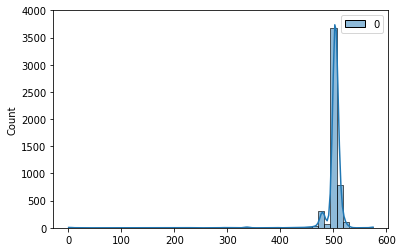

In [ ]:
sns.histplot(df1, bins=50,kde=True)
plt.ylim([0, 4000])
# herhangi bir turnike için çoğunlukla 500 küsür kez ölçüm yapılmıştır.

Sonuç: 12 hafta boyunca her turnike eşit sayıda kayıt alınmamış. Görüldüğü üzere 2 tane turnikeden yalnız bir data alınmıs.

# PROBLEM 1: Duplicated records

In [ ]:
#tekrarı olan satırları görelim.
df[df.duplicated(['TURN','DATE_TIME'],keep=False)]

,TURN,STATION,DATE_TIME,WEEKDAY,DATE,TIME_PERIOD,ENTRIES,EXITS,net_ENTRIES,net_EXITS,TRAFFIC
135938,A060 R001 00-00-05,WHITEHALL S-FRY,2022-05-09 05:00:00,Monday,2022-05-09,0 days 04:00:00,2537853,3977497,2,15,17
135939,A060 R001 00-00-05,WHITEHALL S-FRY,2022-05-09 05:00:00,Monday,2022-05-09,0 days 00:00:00,2537853,3977496,0,-1,-1
663309,N063A R011 00-00-00,42 ST-PORT AUTH,2022-04-07 12:00:00,Thursday,2022-04-07,0 days 04:00:00,2346269,10840267,340,1192,1532
663310,N063A R011 00-00-00,42 ST-PORT AUTH,2022-04-07 12:00:00,Thursday,2022-04-07,0 days 00:00:00,75029,350907,-2271240,-10489360,-12760600
663814,N063A R011 00-00-01,42 ST-PORT AUTH,2022-04-07 12:00:00,Thursday,2022-04-07,0 days 04:00:00,1281668044,180188777,503,614,1117
...,...,...,...,...,...,...,...,...,...,...,...
2364297,R534 R055 01-05-00,FLUSHING-MAIN,2022-04-24 00:00:00,Sunday,2022-04-24,0 days 00:00:00,262144,675,-7113,675,-6438
2364298,R534 R055 01-05-00,FLUSHING-MAIN,2022-04-24 04:00:00,Sunday,2022-04-24,0 days 04:00:00,269258,0,7114,-675,6439
2364299,R534 R055 01-05-00,FLUSHING-MAIN,2022-04-24 04:00:00,Sunday,2022-04-24,0 days 00:00:00,262144,675,-7114,675,-6439
2364300,R534 R055 01-05-00,FLUSHING-MAIN,2022-04-24 08:00:00,Sunday,2022-04-24,0 days 04:00:00,269258,0,7114,-675,6439


In [ ]:
df.groupby(['TURN','DATE_TIME']).size().sort_values(ascending=False)

TURN                 DATE_TIME          
R249 R179 01-05-01   2022-05-02 04:00:00    2
                     2022-05-02 08:00:00    2
                     2022-04-16 00:00:00    2
                     2022-05-03 08:00:00    2
                     2022-05-03 04:00:00    2
                                           ..
N128 R200 00-00-04   2022-05-12 20:00:00    1
                     2022-05-13 00:00:00    1
                     2022-05-13 04:00:00    1
                     2022-05-13 08:00:00    1
TRAM2 R469 00-05-01  2022-05-20 21:00:00    1
Length: 2528022, dtype: int64

In [ ]:
df.groupby(['TURN','DATE_TIME']).size().value_counts()
# 57 tane turnike için aynı gün ve saatte çifter kez ölçüm yapılmış.

1    2527965
2         57
dtype: int64

MANİPÜLASYON: Demek ki 57 tane satır eksilmeli!

In [ ]:
#1- tekrarı olan ölçümler listeden silinir. 2528079 tane satırdan 57 tane eksilecek!
df.drop_duplicates(subset=['TURN', 'DATE_TIME'], inplace=True)
df.reset_index(drop=True,inplace=True) #drop=True önceki indeks sütunu siler
df
# Not: 2.528.022 tane satır görülüyor.

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,TURN,STATION,DATE_TIME,WEEKDAY,DATE,TIME_PERIOD,ENTRIES,EXITS,net_ENTRIES,net_EXITS,TRAFFIC
0,A002 R051 02-00-00,59 ST,2022-02-26 07:00:00,Saturday,2022-02-26,0 days 04:00:00,7689741,2671278,4,21,25
1,A002 R051 02-00-00,59 ST,2022-02-26 11:00:00,Saturday,2022-02-26,0 days 04:00:00,7689758,2671380,17,102,119
2,A002 R051 02-00-00,59 ST,2022-02-26 15:00:00,Saturday,2022-02-26,0 days 04:00:00,7689791,2671465,33,85,118
3,A002 R051 02-00-00,59 ST,2022-02-26 19:00:00,Saturday,2022-02-26,0 days 04:00:00,7689858,2671530,67,65,132
4,A002 R051 02-00-00,59 ST,2022-02-26 23:00:00,Saturday,2022-02-26,0 days 04:00:00,7689890,2671568,32,38,70
...,...,...,...,...,...,...,...,...,...,...,...
2528017,TRAM2 R469 00-05-01,RIT-ROOSEVELT,2022-05-20 05:00:00,Friday,2022-05-20,0 days 04:00:00,0,341,0,0,0
2528018,TRAM2 R469 00-05-01,RIT-ROOSEVELT,2022-05-20 09:00:00,Friday,2022-05-20,0 days 04:00:00,0,342,0,1,1
2528019,TRAM2 R469 00-05-01,RIT-ROOSEVELT,2022-05-20 13:00:00,Friday,2022-05-20,0 days 04:00:00,0,344,0,2,2
2528020,TRAM2 R469 00-05-01,RIT-ROOSEVELT,2022-05-20 17:00:00,Friday,2022-05-20,0 days 04:00:00,0,344,0,0,0


### Sorunlu olan satırların indekslerini belirleyelim ve silelim

In [ ]:
# detecting the rows with inccorrectly calculated net_entries/exits due to concating weekly datas

a=[]
n=df.last_valid_index()
for i in range(n):
    if (df.TURN[i+1] != df.TURN[i]):
        a.append(i+1)
# len(a) =  5043  

# detecting the indices of rows with outliers. Here n represents an upper bound for net_entries/exists to be assumed an "outlier"!
def outlier(n):
    p = (df['net_ENTRIES'] > n) | (0 > df['net_ENTRIES'])
    q = (df['net_EXITS'] > n) | (0 > df['net_EXITS']) 
    return (p | q)
b=set(df[outlier(10000)].index) # len(b)=35.581

c=set(a).union(b) 
# list of all problematic indices
d=list(c) # len(d)= 35.593

# removing all problematic rows
df.drop(index=d,inplace=True)
df.reset_index(drop=True,inplace=True)
# Out of 2,528,022 rows, 35,593 outliers are deleted. There will be 2,492,429 rows left. Only 1.4 percent of all data will be lost.
df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,TURN,STATION,DATE_TIME,WEEKDAY,DATE,TIME_PERIOD,ENTRIES,EXITS,net_ENTRIES,net_EXITS,TRAFFIC
0,A002 R051 02-00-00,59 ST,2022-02-26 07:00:00,Saturday,2022-02-26,0 days 04:00:00,7689741,2671278,4,21,25
1,A002 R051 02-00-00,59 ST,2022-02-26 11:00:00,Saturday,2022-02-26,0 days 04:00:00,7689758,2671380,17,102,119
2,A002 R051 02-00-00,59 ST,2022-02-26 15:00:00,Saturday,2022-02-26,0 days 04:00:00,7689791,2671465,33,85,118
3,A002 R051 02-00-00,59 ST,2022-02-26 19:00:00,Saturday,2022-02-26,0 days 04:00:00,7689858,2671530,67,65,132
4,A002 R051 02-00-00,59 ST,2022-02-26 23:00:00,Saturday,2022-02-26,0 days 04:00:00,7689890,2671568,32,38,70
...,...,...,...,...,...,...,...,...,...,...,...
2492424,TRAM2 R469 00-05-01,RIT-ROOSEVELT,2022-05-20 05:00:00,Friday,2022-05-20,0 days 04:00:00,0,341,0,0,0
2492425,TRAM2 R469 00-05-01,RIT-ROOSEVELT,2022-05-20 09:00:00,Friday,2022-05-20,0 days 04:00:00,0,342,0,1,1
2492426,TRAM2 R469 00-05-01,RIT-ROOSEVELT,2022-05-20 13:00:00,Friday,2022-05-20,0 days 04:00:00,0,344,0,2,2
2492427,TRAM2 R469 00-05-01,RIT-ROOSEVELT,2022-05-20 17:00:00,Friday,2022-05-20,0 days 04:00:00,0,344,0,0,0


### Temizleme sonrası df incelemesi

In [ ]:
df[['STATION','TURN','DATE_TIME','TRAFFIC']].sort_values(by='TRAFFIC',ascending=False).head(10)

,STATION,TURN,DATE_TIME,TRAFFIC
1138530,FLUSHING AV,N414 R316 00-00-01,2022-05-16 07:51:19,14557
1138528,FLUSHING AV,N414 R316 00-00-01,2022-03-30 08:29:03,10514
1644757,34 ST-PENN STA,R138 R293 00-00-04,2022-05-02 14:00:00,9636
1450976,CHRISTOPHER ST,PTH09 R548 00-00-08,2022-04-11 11:44:11,7107
1076042,BRIARWOOD,N337 R255 00-03-00,2022-04-01 08:00:00,6639
1404648,JOURNAL SQUARE,PTH03 R552 00-00-05,2022-05-12 09:55:31,5511
518081,JFK JAMAICA CT1,JFK03 R536 00-00-04,2022-04-15 21:00:00,5465
518259,JFK JAMAICA CT1,JFK03 R536 00-00-04,2022-05-18 21:00:00,4701
184840,NEWKIRK PLAZA,B019 R149 00-00-01,2022-03-09 08:00:00,4351
516591,JFK JAMAICA CT1,JFK03 R536 00-00-01,2022-04-16 01:00:00,3983


In [ ]:
df.iloc[1138525:1138535][["TURN","STATION","DATE_TIME","net_ENTRIES","net_EXITS","TRAFFIC"]]
# görüldüğü üzere 12 hafta boyunca, N414 R316 00-00-01 turnikesinin yalnızca 3 kez kaydı alınmış. 
# Tahminen bu kayıtlar doğru yalnızca listeye #alınmamış olabilir.

,TURN,STATION,DATE_TIME,net_ENTRIES,net_EXITS,TRAFFIC
1138525,N414 R316 00-00-00,FLUSHING AV,2022-05-20 13:00:00,25,128,153
1138526,N414 R316 00-00-00,FLUSHING AV,2022-05-20 17:00:00,58,165,223
1138527,N414 R316 00-00-00,FLUSHING AV,2022-05-20 21:00:00,31,110,141
1138528,N414 R316 00-00-01,FLUSHING AV,2022-03-30 08:29:03,3746,6768,10514
1138529,N414 R316 00-00-01,FLUSHING AV,2022-04-07 07:17:22,1254,2331,3585
1138530,N414 R316 00-00-01,FLUSHING AV,2022-05-16 07:51:19,4954,9603,14557
1138531,N414 R316 00-00-02,FLUSHING AV,2022-02-26 04:00:00,4,12,16
1138532,N414 R316 00-00-02,FLUSHING AV,2022-02-26 08:00:00,15,32,47
1138533,N414 R316 00-00-02,FLUSHING AV,2022-02-26 12:00:00,35,48,83
1138534,N414 R316 00-00-02,FLUSHING AV,2022-02-26 16:00:00,54,39,93


Satırların yuzde 10.1' inde hep 0 giriş - çıkış verileri mevcut, bunların çoğu birkaç saniyelik aralıklar ile kayıt alındığı durumlardır. Ancak 4 saatlik periyodun uzerinde bile cok fazla 0 kaydı var, ki bunlar tüm dastanın yüzde 1lik kısmını bile oluşturmaz:

In [ ]:
import datetime
zero_traffic = df[(df.TRAFFIC == 0) & (df.TIME_PERIOD > datetime.timedelta(hours=4))][["TURN","STATION","DATE_TIME","TIME_PERIOD","net_ENTRIES","net_EXITS","TRAFFIC"]].sort_values(by="TIME_PERIOD")
zero_traffic

,TURN,STATION,DATE_TIME,TIME_PERIOD,net_ENTRIES,net_EXITS,TRAFFIC
1979735,R246 R177 00-00-06,68ST-HUNTER CO,2022-04-23 05:00:01,0 days 04:00:01,0,0,0
2131722,R331 R364 00-05-00,GUN HILL RD,2022-04-19 05:00:01,0 days 04:00:01,0,0,0
359916,E014 R374 00-05-01,BAY PKWY,2022-04-03 05:00:01,0 days 04:00:01,0,0,0
359437,E014 R374 00-05-00,BAY PKWY,2022-04-08 05:00:01,0 days 04:00:01,0,0,0
359407,E014 R374 00-05-00,BAY PKWY,2022-04-03 05:00:01,0 days 04:00:01,0,0,0
...,...,...,...,...,...,...,...
2346242,R600 R224 00-00-01,CLARK ST,2022-03-19 00:00:00,4 days 12:00:00,0,0,0
2345761,R600 R224 00-00-00,CLARK ST,2022-03-19 00:00:00,4 days 12:00:00,0,0,0
712411,N087 R282 01-05-01,SPRING ST,2022-03-06 23:00:00,5 days 08:00:00,0,0,0
2021077,R258 R132 00-05-01,125 ST,2022-04-20 13:00:00,6 days 04:32:49,0,0,0


In [ ]:
n=len(df)
m=len(zero_traffic)
print('4 saat üzeri bir dilimde 0 okuma yapan satırların sayısı = ',m)
print('Bunların yüzdesi =',(m/n)*100 )

4 saat üzeri bir dilimde 0 okuma yapan satırların sayısı =  17819
Bunların yüzdesi = 0.7149250791095754


Peki bu sıfır trafiğe sahip verilerin dağılımı nasıl? Hepsi belli istasyonlara mı ait? İnceleyelim:


In [ ]:
zero_traffic.groupby(["STATION"]).size().sort_values(ascending=False)
# totalde 378 tane istasyon var nerdeyse hepsinde en az bir kez 0 ölçümlü satır var.

STATION
NEWARK C           2737
THIRTY ST          2318
NEWARK HW BMEBE    1849
HARRISON           1314
NEWARK BM BW       1281
                   ... 
96 ST-2 AVE           1
EAST BROADWAY         1
AVENUE X              1
BERGEN ST             1
HOWARD BCH JFK        1
Length: 207, dtype: int64

In [ ]:
zero_traffic.groupby(["STATION"]).size().sort_values(ascending=False).head(20)

STATION
NEWARK C           2737
THIRTY ST          2318
NEWARK HW BMEBE    1849
HARRISON           1314
NEWARK BM BW       1281
LACKAWANNA         1222
THIRTY THIRD ST    1212
NEWARK HM HE       1074
PATH NEW WTC       1013
CITY / BUS          807
TWENTY THIRD ST     690
PATH WTC 2          550
14TH STREET         231
EXCHANGE PLACE      226
JOURNAL SQUARE      216
9TH STREET           83
GROVE STREET         44
WALL ST              39
METS-WILLETS PT      32
FULTON ST            32
dtype: int64

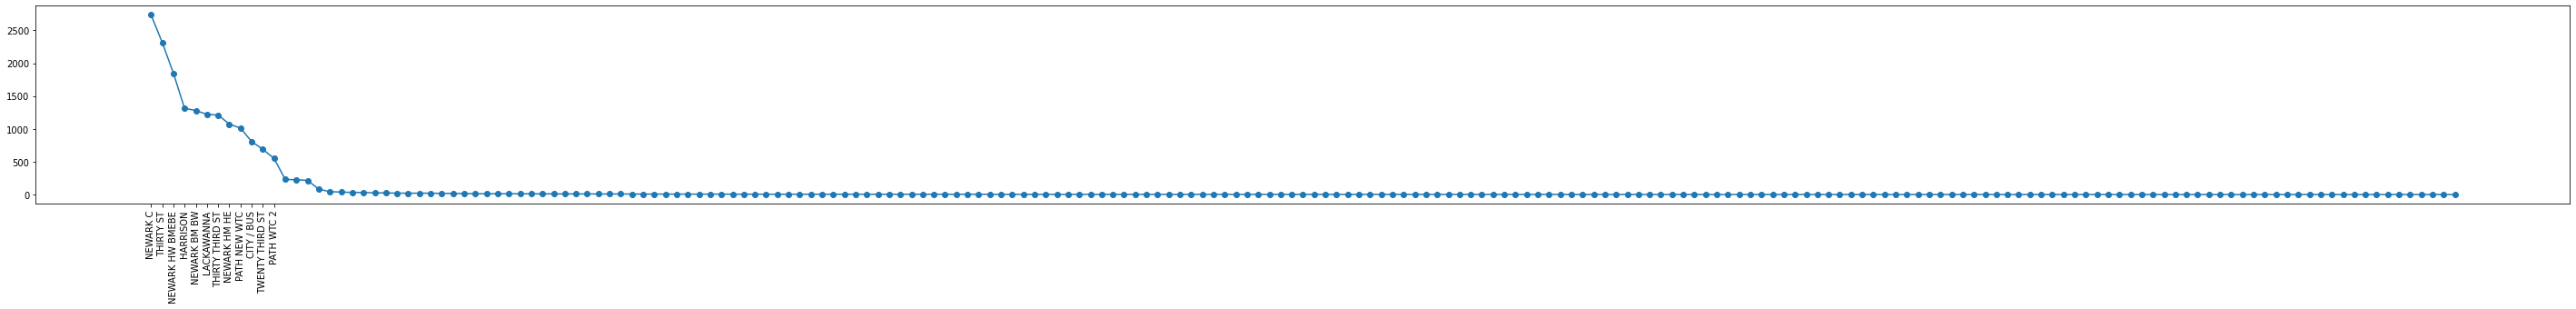

In [ ]:
plt.figure(figsize=[50,4])
my_data = zero_traffic.groupby(["STATION"]).size().sort_values(ascending=False)
plt.plot(my_data,marker="o")
x = my_data.index[:12]
plt.xticks(x,rotation=90);

SONUÇ: Özellikle 12 tane istasyonda çok sıfır ölçüm görülüyor. Bu süreçte bakıma alınmış olabilir.

In [ ]:
df.net_ENTRIES.sort_values(ascending=False).head(10)

1644757    7557
1138530    4954
1404648    4498
1138528    3746
1450976    2679
2239152    2510
2245451    2137
2005294    1916
2239641    1749
404037     1722
Name: net_ENTRIES, dtype: int64

In [ ]:
df.iloc[1644755:1644759] #orijinal tabloda da 2022-04-26 06:00:00 sonra "R138 R293 00-00-04" turnikesi için veri yok. 

,TURN,STATION,DATE_TIME,WEEKDAY,DATE,TIME_PERIOD,ENTRIES,EXITS,net_ENTRIES,net_EXITS,TRAFFIC
1644755,R138 R293 00-00-04,34 ST-PENN STA,2022-04-26 02:00:00,Tuesday,2022-04-26,0 days 04:00:00,45621,17761,34,22,56
1644756,R138 R293 00-00-04,34 ST-PENN STA,2022-04-26 06:00:00,Tuesday,2022-04-26,0 days 04:00:00,45657,17767,36,6,42
1644757,R138 R293 00-00-04,34 ST-PENN STA,2022-05-02 14:00:00,Monday,2022-05-02,6 days 08:00:00,53214,19846,7557,2079,9636
1644758,R138 R293 00-00-04,34 ST-PENN STA,2022-05-02 18:00:00,Monday,2022-05-02,0 days 04:00:00,53463,20043,249,197,446


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


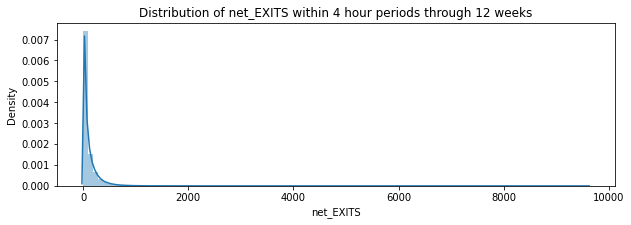

In [ ]:
plt.figure(figsize=[10,3])
plt.title("Distribution of net_EXITS within 4 hour periods through 12 weeks")
sns.distplot(df.net_EXITS, bins=100, kde = True)

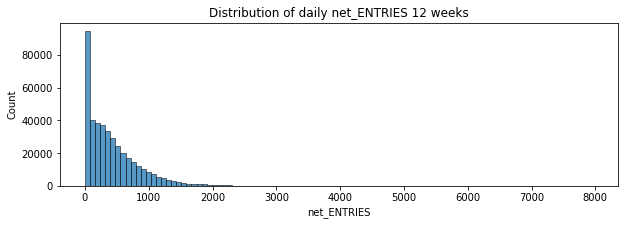

In [ ]:
plt.figure(figsize=[10,3])
plt.title("Distribution of daily net_ENTRIES 12 weeks")
sns.histplot(df.groupby(['TURN','DATE']).net_ENTRIES.sum(), bins=100, kde=False)

Aslında 5000 de outlier için iyi bir sınır gibi görünüyor. Ama biz 10000 seçtik.

Günlere göre trafik dağılımına bakalım:

In [ ]:
daily_traffic = df.groupby("DATE").TRAFFIC.sum()
daily_traffic.sort_values()

DATE
2022-03-13    2459549
2022-02-27    2542423
2022-03-06    2574075
2022-04-03    2691689
2022-05-08    2766705
               ...   
2022-05-17    5812113
2022-05-11    5812542
2022-05-19    5819751
2022-05-05    5860184
2022-05-18    6021990
Name: TRAFFIC, Length: 84, dtype: int64

In [ ]:
daily_traffic.index[-1]

Timestamp('2022-05-20 00:00:00')

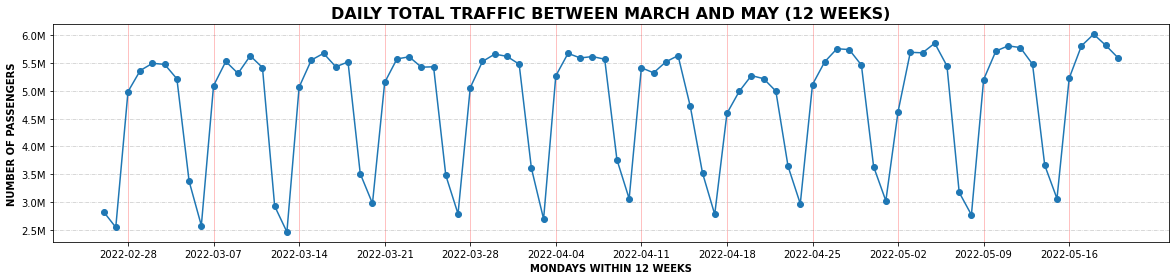

In [ ]:
plt.figure(figsize=(20,4))
plt.plot(daily_traffic,marker="o")

plt.title("DAILY TOTAL TRAFFIC BETWEEN MARCH AND MAY (12 WEEKS)", fontweight="bold",fontsize=16)
plt.grid(axis='y', color = 'grey',ls="-." ,linewidth = 0.6, alpha=0.5)
plt.grid(axis="x", color="red", ls="-",alpha=0.3)
plt.ylabel('NUMBER OF PASSENGERS', fontweight="bold")
plt.xlabel('MONDAYS WITHIN 12 WEEKS',fontweight='bold')

# filtering the values (datetime) on x axis 
import matplotlib.dates as mdates
import datetime as dt
first = daily_traffic.index[2] # first monday (28feb)
last = daily_traffic.index[-1] # last day(it does not have to be monday)
mondays = mdates.drange(first,last,dt.timedelta(days=7)) # picking mondays within 12 weeks
plt.xticks(mondays,rotation=0)

# formatting numbers on y axis
ylabels = ['{:,.1f}'.format(y) + 'M' for y in plt.gca().get_yticks()/1000000]
plt.gca().set_yticklabels(ylabels);


# TOP TEN STATIONS

In [ ]:
#Martın ilk haftasından itibaren 12 haftanın sonundaki istasyonlara göre trafik sayıları sıralanır.
top_ten= df.groupby(['STATION']).sum().TRAFFIC.sort_values(ascending=False).head(10)
pd.DataFrame(top_ten)

,TRAFFIC
STATION,
34 ST-PENN STA,10727329
GRD CNTRL-42 ST,8620825
34 ST-HERALD SQ,7776486
14 ST-UNION SQ,7038245
86 ST,6993163
23 ST,6866183
TIMES SQ-42 ST,6599725
42 ST-PORT AUTH,6329782
FULTON ST,5987855


In [ ]:
top_ten.index[:5]

Index(['34 ST-PENN STA', 'GRD CNTRL-42 ST', '34 ST-HERALD SQ',
       '14 ST-UNION SQ', '86 ST'],
      dtype='object', name='STATION')

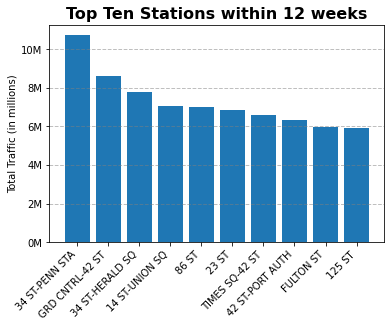

In [ ]:
x = top_ten.index
y = top_ten.values
plt.bar(x,y)

plt.xticks(rotation=45, ha='right')
plt.yticks()
plt.title("Top Ten Stations within 12 weeks",fontweight="bold",fontsize=16)
plt.grid(axis='y', color = 'grey', linestyle="--",linewidth = 1, alpha=0.5)
plt.ylabel('Total Traffic (in millions)')
# formatting values on y axis
ylabels = ['{:,.0f}'.format(y) + 'M' for y in plt.gca().get_yticks()/1000000]
plt.gca().set_yticklabels(ylabels);

# or
# after plotting the data, format the labels
# current_values = plt.gca().get_yticks()
# plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

# Bu ilk 10 istasyon haftanın hangi günleri daha yoğundur?

In [ ]:
traffic_weekday = df.groupby(['STATION','WEEKDAY']).TRAFFIC.sum()
traffic_weekday

STATION    WEEKDAY  
1 AV       Friday       332637
           Monday       286853
           Saturday     223786
           Sunday       181074
           Thursday     326055
                         ...  
ZEREGA AV  Saturday      19153
           Sunday        15736
           Thursday      38065
           Tuesday       38870
           Wednesday     39039
Name: TRAFFIC, Length: 2646, dtype: int64

In [ ]:
index=['Monday', "Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
traffic_weekday["1 AV"]

WEEKDAY
Friday       332637
Monday       286853
Saturday     223786
Sunday       181074
Thursday     326055
Tuesday      311758
Wednesday    323342
Name: TRAFFIC, dtype: int64

Haftanın günlerini sıralayalım:

In [ ]:
traffic_weekday["1 AV"].reindex(index=['Monday', "Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

WEEKDAY
Monday       286853
Tuesday      311758
Wednesday    323342
Thursday     326055
Friday       332637
Saturday     223786
Sunday       181074
Name: TRAFFIC, dtype: int64

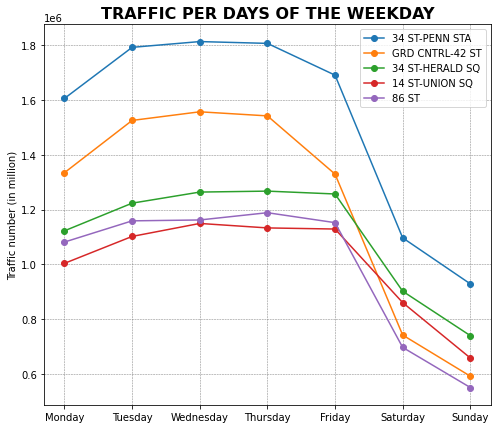

In [ ]:
plt.figure(figsize=[8,7])
for sta in top_ten.index[:5]:
    plt.plot(traffic_weekday[sta].reindex(index=['Monday', "Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]),marker="o" )

# süslemeler
plt.xticks()
plt.yticks()
plt.title("TRAFFIC PER DAYS OF THE WEEKDAY",fontweight="bold",fontsize=16)
plt.grid(color = 'grey', linestyle="--", linewidth = 0.5)
plt.ylabel('Traffic number (in million)')

# y eksenindeki sayıların tam açılımını yapalım ve virgülle ondalikları ayıralım.
# current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
# plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.legend(top_ten.index[:5]);


In [ ]:
df1 = df.groupby(['STATION','WEEKDAY']).TRAFFIC.sum().unstack()
# reorder of the columns
TrafficWeekly = df1[["Monday", "Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]]
TrafficWeekly


WEEKDAY,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
STATION,,,,,,,
1 AV,286853,311758,323342,326055,332637,223786,181074
103 ST,350713,373571,382435,378977,369001,216163,184844
103 ST-CORONA,302940,313550,317237,317582,314341,226223,183491
104 ST,47179,50332,50852,50495,47548,22986,16523
110 ST,148034,158895,160257,159246,157116,92810,75207
...,...,...,...,...,...,...,...
WOODLAWN,55977,60217,59832,60170,58891,36847,28585
WORLD TRADE CTR,159409,176062,173976,186816,167133,90425,73238
WTC-CORTLANDT,138631,141725,139789,160742,145189,95243,77349


In [ ]:
top_ten_weekly = TrafficWeekly.loc[top_ten.index]
top_ten_weekly.style.format("{:,.0f}")

WEEKDAY,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
STATION,,,,,,,
34 ST-PENN STA,"1,604,637","1,790,551","1,811,556","1,804,992","1,689,286","1,096,910","929,397"
GRD CNTRL-42 ST,"1,334,217","1,524,465","1,555,875","1,540,992","1,328,997","742,989","593,290"
34 ST-HERALD SQ,"1,122,552","1,223,196","1,263,589","1,267,055","1,256,639","902,589","740,866"
14 ST-UNION SQ,"1,004,093","1,102,090","1,149,348","1,133,060","1,129,011","861,146","659,497"
86 ST,"1,081,622","1,158,804","1,162,009","1,188,452","1,152,252","698,015","552,009"
23 ST,"1,040,741","1,164,348","1,189,626","1,195,989","1,065,012","690,678","519,789"
TIMES SQ-42 ST,"906,519","1,010,725","1,061,596","1,057,303","1,023,195","842,612","697,775"
42 ST-PORT AUTH,"921,238","1,010,733","1,038,755","1,042,311","1,014,253","712,451","590,041"
FULTON ST,"914,861","1,057,504","1,051,140","1,051,858","966,606","521,368","424,518"


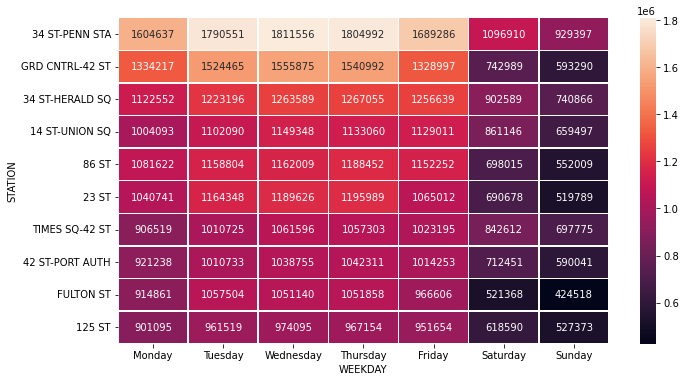

In [ ]:
plt.figure(figsize=[11,6])
sns.heatmap(top_ten_weekly,annot=True,linewidths=.5,fmt=".0f" ) #annot hücrelerin ortasına trafik değerini yazar

### ANALYSIS OF 34 ST-PENN STA

En yoğun istasyonun turnikelerini kıyaslayalım:

#### DAILY PENN

In [ ]:
# en yoğun istasyonun 12 hafta boyunca günlük trafik sayısı grafiği
penn = df[df.STATION == '34 ST-PENN STA']
daily_penn = penn.groupby(['DATE']).TRAFFIC.sum()
daily_penn

DATE
2022-02-26     69697
2022-02-27     68534
2022-02-28    127552
2022-03-01    141867
2022-03-02    143362
               ...  
2022-05-16    136306
2022-05-17    156816
2022-05-18    161433
2022-05-19    158944
2022-05-20    151747
Name: TRAFFIC, Length: 84, dtype: int64

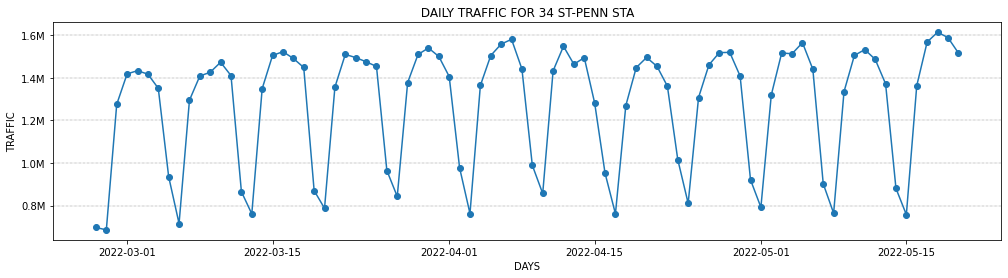

In [ ]:
plt.figure(figsize=[17,4])
plt.plot(daily_penn,marker="o")

plt.title(" DAILY TRAFFIC FOR 34 ST-PENN STA ")
plt.grid(axis='y', color = 'grey',ls="-." ,linewidth = 0.4)
plt.ylabel('TRAFFIC')
plt.xlabel('DAYS')


ylabels = ['{:,.1f}'.format(y) + 'M' for y in plt.gca().get_yticks()/100000]
plt.gca().set_yticklabels(ylabels);

#### WEEKLY PENN

In [ ]:
penn = df[df.STATION == '34 ST-PENN STA']
print("There exists ",penn.TURN.nunique()," many turnstiles for 34 ST-PENN.")

There exists  100  many turnstiles for 34 ST-PENN.


In [ ]:
# 12 hafta boyunca penn istasyonunda en yoğun ilk 10 turnike
penn_turn = penn.groupby(["TURN"]).TRAFFIC.sum().sort_values(ascending=False).head(10)
penn_turn

TURN
N067 R012 00-05-00    357910
R138 R293 00-03-04    329719
R135 R031 01-00-03    269571
R135 R031 01-00-04    265026
R138 R293 00-00-00    262364
N067 R012 00-05-01    249356
R138 R293 00-00-01    235832
N073 R013 02-00-01    223561
R138 R293 00-00-02    220618
R142 R293 01-00-03    215910
Name: TRAFFIC, dtype: int64

In [ ]:
penn_turn_weekday = penn.groupby(["TURN","WEEKDAY"]).TRAFFIC.sum().sort_values(ascending=False)
penn_turn_weekday

TURN                WEEKDAY  
N067 R012 00-05-00  Thursday     58731
                    Friday       58194
                    Wednesday    58163
R138 R293 00-03-04  Wednesday    57798
                    Thursday     57426
                                 ...  
R137 R031 02-03-01  Thursday         0
R137 R031 02-03-00  Saturday         0
R137 R031 02-03-01  Sunday           0
                    Tuesday          0
                    Monday           0
Name: TRAFFIC, Length: 700, dtype: int64

Haftanın günlerine göre dağılımı bir tablo ile görelim: unstack komutu yeterlidir.

In [ ]:
penn_turn_weekday_table = penn_turn_weekday.unstack()
penn_turn_weekday_table = penn_turn_weekday_table[["Monday", "Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]]
penn_turn_weekday_table

WEEKDAY,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
TURN,,,,,,,
N067 R012 00-00-00,20040,23219,24266,23149,19593,11704,9724
N067 R012 00-00-01,11217,12479,12507,12461,10976,7162,5995
N067 R012 00-00-02,14413,16444,16912,16304,14472,9438,8180
N067 R012 00-00-03,14112,16394,16580,16390,15282,9411,7877
N067 R012 00-00-04,18803,21155,21870,21345,19097,12372,10463
...,...,...,...,...,...,...,...
R142 R293 01-00-01,14942,15997,16721,16737,16840,14347,11923
R142 R293 01-00-02,18628,19854,20351,20271,20717,19536,16321
R142 R293 01-00-03,30029,31989,33199,33117,32937,29808,24831


En yoğun turnike "N067 R012 00-05-00" olarak görülür. Yani Control Area:N067, UNIT:R012, SCP:00-05-00 olan turnikedir.

In [ ]:
penn_turn_weekday["N067 R012 00-05-00"]

WEEKDAY
Thursday     58731
Friday       58194
Wednesday    58163
Tuesday      56240
Monday       50704
Saturday     40796
Sunday       35082
Name: TRAFFIC, dtype: int64

En yoğun ilk 10 turnikenin haftalık dağılımını bir tablo üzerinde çizelim: 

#### GRAPH OF TRAFFIC-WEEKDAYS FOR TURNSTILES OF PENN 

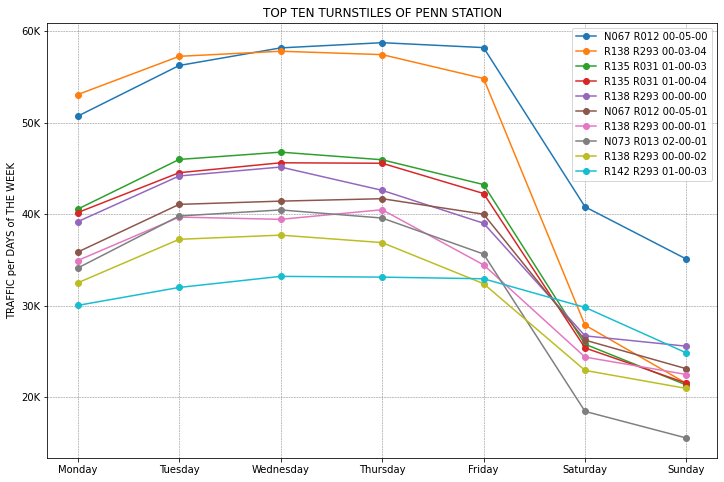

In [ ]:
# Penn istasyonuna ait en yoğun 10 turnikenin haftanın günlerine göre toplam trafik dağılımı
plt.figure(figsize=[12,8])
for turn in penn_turn.index:
    plt.plot(penn_turn_weekday[turn].reindex(index=['Monday', "Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]),marker='o' )

# süslemeler
plt.xticks()
plt.yticks()
plt.title("TOP TEN TURNSTILES OF PENN STATION")
plt.grid(color = 'grey', linestyle="--", linewidth = 0.5)
plt.ylabel('TRAFFIC per DAYS of THE WEEK')

# y eksenindeki sayıları formatlıyoruz.
ylabels = ['{:,.0f}'.format(y) + 'K' for y in plt.gca().get_yticks()/1000]
plt.gca().set_yticklabels(ylabels);

plt.legend(penn_turn.index);


Remark: Penn istasyonunda 12 haftalık periyotta 10. sırada olan turnike "R142 R293 01-00-03" haftasonları 2. sırada görülüyor.

#### 4HOURS PERIOD - PENN 

In [ ]:
df

,TURN,STATION,DATE_TIME,WEEKDAY,DATE,TIME_PERIOD,ENTRIES,EXITS,net_ENTRIES,net_EXITS,TRAFFIC
0,A002 R051 02-00-00,59 ST,2022-02-26 07:00:00,Saturday,2022-02-26,0 days 04:00:00,7689741,2671278,4,21,25
1,A002 R051 02-00-00,59 ST,2022-02-26 11:00:00,Saturday,2022-02-26,0 days 04:00:00,7689758,2671380,17,102,119
2,A002 R051 02-00-00,59 ST,2022-02-26 15:00:00,Saturday,2022-02-26,0 days 04:00:00,7689791,2671465,33,85,118
3,A002 R051 02-00-00,59 ST,2022-02-26 19:00:00,Saturday,2022-02-26,0 days 04:00:00,7689858,2671530,67,65,132
4,A002 R051 02-00-00,59 ST,2022-02-26 23:00:00,Saturday,2022-02-26,0 days 04:00:00,7689890,2671568,32,38,70
...,...,...,...,...,...,...,...,...,...,...,...
2492424,TRAM2 R469 00-05-01,RIT-ROOSEVELT,2022-05-20 05:00:00,Friday,2022-05-20,0 days 04:00:00,0,341,0,0,0
2492425,TRAM2 R469 00-05-01,RIT-ROOSEVELT,2022-05-20 09:00:00,Friday,2022-05-20,0 days 04:00:00,0,342,0,1,1
2492426,TRAM2 R469 00-05-01,RIT-ROOSEVELT,2022-05-20 13:00:00,Friday,2022-05-20,0 days 04:00:00,0,344,0,2,2
2492427,TRAM2 R469 00-05-01,RIT-ROOSEVELT,2022-05-20 17:00:00,Friday,2022-05-20,0 days 04:00:00,0,344,0,0,0


In [ ]:
df.DATE_TIME.dt.hour

0           7
1          11
2          15
3          19
4          23
           ..
2492424     5
2492425     9
2492426    13
2492427    17
2492428    21
Name: DATE_TIME, Length: 2492429, dtype: int64

In [ ]:
df[["TURN","STATION","DATE_TIME","TIME_PERIOD","TRAFFIC"]].sort_values(by="TIME_PERIOD",ascending=False)

,TURN,STATION,DATE_TIME,TIME_PERIOD,TRAFFIC
1138530,N414 R316 00-00-01,FLUSHING AV,2022-05-16 07:51:19,39 days 00:33:57,14557
1138528,N414 R316 00-00-01,FLUSHING AV,2022-03-30 08:29:03,25 days 23:51:36,10514
1249405,N528 R257 01-05-01,EAST BROADWAY,2022-03-25 20:00:00,21 days 11:23:08,5
1607368,R121 R290 01-05-00,HOUSTON ST,2022-03-23 21:00:00,15 days 17:00:00,1
1450976,PTH09 R548 00-00-08,CHRISTOPHER ST,2022-04-11 11:44:11,12 days 02:25:01,7107
...,...,...,...,...,...
459020,H041 R152 00-05-03,CANARSIE-ROCKAW,2022-05-04 23:16:59,0 days 00:00:01,0
455411,H041 R152 00-03-00,CANARSIE-ROCKAW,2022-05-04 23:16:40,0 days 00:00:01,0
460053,H041 R152 00-06-01,CANARSIE-ROCKAW,2022-05-04 23:17:08,0 days 00:00:01,0
455417,H041 R152 00-03-00,CANARSIE-ROCKAW,2022-05-04 23:17:08,0 days 00:00:01,0


In [ ]:
df.TIME_PERIOD[0]

Timedelta('0 days 04:00:00')

In [ ]:
import datetime
df[df.TIME_PERIOD > datetime.timedelta(hours=5)][["STATION","TURN","TIME_PERIOD","TRAFFIC"]].sort_values("TIME_PERIOD",ascending=False).head(20)

,STATION,TURN,TIME_PERIOD,TRAFFIC
1138530,FLUSHING AV,N414 R316 00-00-01,39 days 00:33:57,14557
1138528,FLUSHING AV,N414 R316 00-00-01,25 days 23:51:36,10514
1249405,EAST BROADWAY,N528 R257 01-05-01,21 days 11:23:08,5
1607368,HOUSTON ST,R121 R290 01-05-00,15 days 17:00:00,1
1450976,CHRISTOPHER ST,PTH09 R548 00-00-08,12 days 02:25:01,7107
1483255,THIRTY THIRD ST,PTH17 R541 01-00-02,11 days 08:23:18,0
2467326,GUN HILL RD,R728 R226 00-05-01,11 days 08:00:00,1
1076042,BRIARWOOD,N337 R255 00-03-00,11 days 00:00:00,6639
336153,AVENUE U,D015 R396 00-06-01,10 days 09:00:00,532
2245256,ASTORIA DITMARS,R515 R095 00-00-03,10 days 08:01:52,2802


In [ ]:
df[(df.TIME_PERIOD > datetime.timedelta(hours=4)) & (df.TRAFFIC > 1000) ].drop(columns="DATE").sort_values("TIME_PERIOD")

,TURN,STATION,DATE_TIME,WEEKDAY,TIME_PERIOD,ENTRIES,EXITS,net_ENTRIES,net_EXITS,TRAFFIC
1516779,PTH21 R540 01-00-00,PATH WTC 2,2022-04-22 08:01:01,Friday,0 days 04:02:04,12127,57159,52,1017,1069
1516741,PTH21 R540 01-00-00,PATH WTC 2,2022-04-15 16:39:35,Friday,0 days 04:02:07,7872,38091,216,1128,1344
1441808,PTH07 R550 00-00-07,CITY / BUS,2022-04-22 19:01:12,Friday,0 days 04:02:48,196232,241000,431,572,1003
1516523,PTH21 R540 01-00-00,PATH WTC 2,2022-03-08 09:47:39,Tuesday,0 days 04:02:55,81593,355410,52,2430,2482
1516899,PTH21 R540 01-00-00,PATH WTC 2,2022-05-13 07:47:03,Friday,0 days 04:03:16,11632,56877,29,994,1023
...,...,...,...,...,...,...,...,...,...,...
2245256,R515 R095 00-00-03,ASTORIA DITMARS,2022-03-27 16:00:00,Sunday,10 days 08:01:52,2664414,571544,15,2787,2802
1076042,N337 R255 00-03-00,BRIARWOOD,2022-04-01 08:00:00,Friday,11 days 00:00:00,1635,25957,34,6605,6639
1450976,PTH09 R548 00-00-08,CHRISTOPHER ST,2022-04-11 11:44:11,Monday,12 days 02:25:01,102657,175109,2679,4428,7107
1138528,N414 R316 00-00-01,FLUSHING AV,2022-03-30 08:29:03,Wednesday,25 days 23:51:36,1951250,1961475,3746,6768,10514


In [ ]:
ers=df[df.TIME_PERIOD < datetime.timedelta(minutes=5)][["STATION","TURN","TIME_PERIOD","TRAFFIC"]].sort_values("TIME_PERIOD",ascending=False)
ers

,STATION,TURN,TIME_PERIOD,TRAFFIC
517096,JFK JAMAICA CT1,JFK03 R536 00-00-02,0 days 00:04:46,1
860198,HOWARD BCH JFK,N182 R414 00-05-00,0 days 00:04:44,0
859691,HOWARD BCH JFK,N182 R414 00-00-02,0 days 00:04:44,3
860705,HOWARD BCH JFK,N182 R414 00-05-01,0 days 00:04:44,0
859184,HOWARD BCH JFK,N182 R414 00-00-01,0 days 00:04:44,0
...,...,...,...,...
460053,CANARSIE-ROCKAW,H041 R152 00-06-01,0 days 00:00:01,0
459016,CANARSIE-ROCKAW,H041 R152 00-05-03,0 days 00:00:01,0
454385,CANARSIE-ROCKAW,H041 R152 00-00-03,0 days 00:00:01,0
454378,CANARSIE-ROCKAW,H041 R152 00-00-03,0 days 00:00:01,0


In [ ]:
ers.TRAFFIC.sort_values(ascending=False).head(20)

1021300    38
1207768    28
1205726    28
1936224    26
2348038    23
40093      20
2321157    20
1020292    19
1014739    19
1020796    18
1205511    17
39590      17
2011891    17
164318     16
2351056    16
2322684    16
1106558    15
2324211    15
164314     15
2350050    14
Name: TRAFFIC, dtype: int64

In [ ]:
df.iloc[517090:517100]

,TURN,STATION,DATE_TIME,WEEKDAY,DATE,TIME_PERIOD,ENTRIES,EXITS,net_ENTRIES,net_EXITS,TRAFFIC
517090,JFK03 R536 00-00-02,JFK JAMAICA CT1,2022-04-15 09:00:00,Friday,2022-04-15,0 days 04:00:00,331546,432203,0,204,204
517091,JFK03 R536 00-00-02,JFK JAMAICA CT1,2022-04-15 13:00:00,Friday,2022-04-15,0 days 04:00:00,331546,432485,0,282,282
517092,JFK03 R536 00-00-02,JFK JAMAICA CT1,2022-04-15 17:00:00,Friday,2022-04-15,0 days 04:00:00,331546,433077,0,592,592
517093,JFK03 R536 00-00-02,JFK JAMAICA CT1,2022-04-15 21:00:00,Friday,2022-04-15,0 days 04:00:00,331546,433428,0,351,351
517094,JFK03 R536 00-00-02,JFK JAMAICA CT1,2022-04-16 01:00:00,Saturday,2022-04-16,0 days 04:00:00,331546,433478,0,50,50
517095,JFK03 R536 00-00-02,JFK JAMAICA CT1,2022-04-16 04:55:14,Saturday,2022-04-16,0 days 03:55:14,331546,433532,0,54,54
517096,JFK03 R536 00-00-02,JFK JAMAICA CT1,2022-04-16 05:00:00,Saturday,2022-04-16,0 days 00:04:46,331546,433533,0,1,1
517097,JFK03 R536 00-00-02,JFK JAMAICA CT1,2022-04-16 09:00:00,Saturday,2022-04-16,0 days 04:00:00,331546,433627,0,94,94
517098,JFK03 R536 00-00-02,JFK JAMAICA CT1,2022-04-16 13:00:00,Saturday,2022-04-16,0 days 04:00:00,331546,433901,0,274,274
517099,JFK03 R536 00-00-02,JFK JAMAICA CT1,2022-04-16 17:00:00,Saturday,2022-04-16,0 days 04:00:00,331546,434416,0,515,515


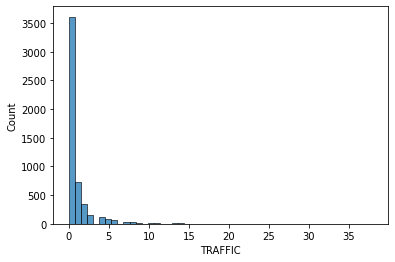

In [ ]:
sns.histplot(ers.TRAFFIC,bins=50,kde=False)